In [1]:
#initialization
import matplotlib.pyplot as plt
import math

# importing Qiskit
from qiskit import Aer, transpile, assemble
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

# importing Qiskit
from qiskit.quantum_info import DensityMatrix
from qiskit.extensions import UnitaryGate

In [29]:
import numpy as np
import scipy.linalg as la
hermitian_eigs = [-3.5920975212346135e-09+0.9817477054782923j,
                  -3.5920975212346135e-09+0.9817477054782923j,
                  -3.5920975212346135e-09+0.9817477054782923j,
                  -3.5920975212346135e-09+0.9817477054782923j]
A = np.diag(hermitian_eigs).astype('complex')
eigs_h, vecs_h = np.linalg.eig(A)
RESULTS = []
# print(eigs_h)

In [30]:
ERROR = 0.0
def add_noise_to_gate(U):
    noise = np.random.uniform(-ERROR,ERROR,U.shape)
    noise = noise + noise.conj().T
    U_noise = la.expm(1j*(noise.T))
    U = np.dot(U_noise, U)
    return U

In [31]:
U = la.expm(1*A)
# check on unitarnyness
UnitaryGate(U)
eigs_u, vecs_u = np.linalg.eig(U)

In [32]:
n_of_qubs = 5
qpe = QuantumCircuit(n_of_qubs+2, n_of_qubs)
qpe.initialize(vecs_u[1], [-2, -1])
# vecs_u[1]

In [33]:
qpe_clear = QuantumCircuit(n_of_qubs+2)
for qubit in range(n_of_qubs):
    qpe_clear.h(qubit)
# print(qpe_clear)

In [34]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qpe_clear, backend)
result = job.result()
op = result.get_unitary(qpe_clear).data
# op = add_noise_to_gate(op)
U_h = UnitaryGate(op)
np.shape(U_h)

(128, 128)

In [35]:
qpe.append(U_h, range(n_of_qubs+2))    
# qpe.draw()

In [36]:
from qiskit.circuit.library import UnitaryGate
repetitions = 1
for i in range(n_of_qubs):
    for rep in range(repetitions):
        qpe.append(UnitaryGate(U).control(1), [i, -2, -1])
    repetitions *= 2

# qpe.draw()

In [37]:
# circ = QuantumCircuit(n_of_qubs+2, n_of_qubs)
# from qiskit.circuit.library import UnitaryGate
# repetitions = 1
# for i in range(n_of_qubs):
#     for rep in range(repetitions):
#         circ.append(UnitaryGate(U).control(1), [i, -2, -1])
#     repetitions *= 2
# backend = Aer.get_backend('unitary_simulator')
# job = execute(circ, backend)
# result = job.result()
# op = result.get_unitary(circ).data
# # op = add_noise_to_gate(op)
# # U_h = UnitaryGate(op)
# np.set_printoptions(threshold=np.inf)
# np.shape(op)
# np.round(op,2)
# qpe.draw()

In [38]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2): #n//2
        qc.swap(qubit, n-qubit-1)
    for j in range(n): #n
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [39]:
# del
# qpe_clear = QuantumCircuit(n_of_qubs)
# qft_dagger(qpe_clear, n_of_qubs)
# backend = Aer.get_backend('unitary_simulator')
# job = execute(qpe_clear, backend)
# result = job.result()
# op = result.get_unitary(qpe_clear).data
# # np.round(op, 2)
# 
# U_h = UnitaryGate(op)
# qpe_clear = QuantumCircuit(n_of_qubs+2)
# qpe_clear.append(U_h, range(n_of_qubs))
# backend = Aer.get_backend('unitary_simulator')
# job = execute(qpe_clear, backend)
# result = job.result()
# op = result.get_unitary(qpe_clear).data
# np.round(op, 3)

In [40]:
# # Apply inverse QFT
qpe_clear = QuantumCircuit(n_of_qubs)
qft_dagger(qpe_clear, n_of_qubs)
backend = Aer.get_backend('unitary_simulator')
job = execute(qpe_clear, backend)
result = job.result()
op = result.get_unitary(qpe_clear).data
# print(qpe_clear)

In [41]:
U_h = UnitaryGate(op)
qpe.append(U_h, range(n_of_qubs))

In [42]:
np.round(DensityMatrix(qpe), 3)

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [43]:
# print(qpe.draw())

C:\Users\lisis\AppData\Local\Temp\ipykernel_17268\4287731533.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


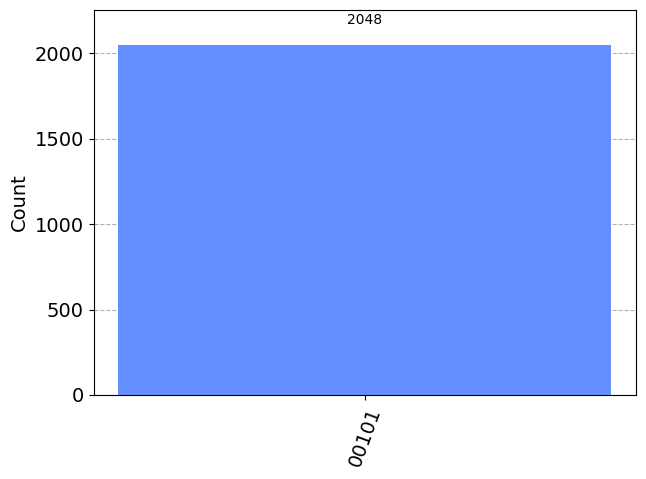

In [44]:
for n in range(n_of_qubs):
    qpe.measure(n,n)
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
answer_to_plot = answer.copy()
answer = sorted(answer.items(), key=lambda x:x[1])
new_ans = []
for pair in answer:
    new_ans.append((int(pair[0],2), pair[1]))
answer = new_ans
plot_histogram(answer_to_plot)

### Реальные значения искомых собственных значений унитарной матрицы:

In [45]:
eigs_u

array([0.55557023+0.83146961j, 0.55557023+0.83146961j,
       0.55557023+0.83146961j, 0.55557023+0.83146961j])

### Распределение полученных ответов по типу $[(n_1, n_{shots}), (n_2, n_{shots}), (n_3, n_{shots}), ..., (n_n, n_{shots})]$,
### где $n_n$ - десятичное измеренное число, $n_{shots}$ - число измерений

In [46]:
print(answer)

[(5, 2048)]


### Формула, по которой можно расчитать собственное значение выглядит как $e^{j\cdot 2\cdot \pi \cdot n/(2^{n_{qubs}})}$,
### где $n$ - десятичное измеренное число, $n_{qubs}$ - число кубитов (ниже используется как n_of_qubs)

In [48]:
import scipy.linalg as la
print(la.expm(1j*2*np.pi*1/(2**n_of_qubs)))

[[6.123234e-17+1.j]]


### Подстановка желаемого числа кубитов и желаемого измеренного десятичного числа позволяет искусственно сгенерировать желаемые собственные значения.
### Например, пусть мы имеем 4 кубита и хотим иметь 3 и 1 как результат десятичного измеренного числа. Тогда собственные числа $eig_u$ унитарной матрицы могут быть посчитаны следующим образом:
```
print(la.expm(1j*2*np.pi*3/(2**4)))
print(la.expm(1j*2*np.pi*1/(2**4)))
```
```
out:
[[0.38268343+0.92387953j]]
[[0.92387953+0.38268343j]]
```

In [48]:
print(la.expm(1j*2*np.pi*1/(2**5)))
print(la.expm(1j*2*np.pi*2/(2**5)))
print(la.expm(1j*2*np.pi*3/(2**5)))
print(la.expm(1j*2*np.pi*4/(2**5)))

[[0.98078528+0.19509032j]]
[[0.92387953+0.38268343j]]
[[0.83146961+0.55557023j]]
[[0.70710678+0.70710678j]]


### Тогда диагональные элементы эрмитовой матрицы имеют вид $log(eig_u)$:
```
print(np.log(0.92387953+0.38268343j))
```
```
out:
(-3.225207111789145e-09+0.39269908047469393j)
```

In [49]:
print(np.log(0.98078528+0.19509032j))
print(np.log(0.92387953+0.38268343j))
print(np.log(0.83146961+0.55557023j))
print(np.log(0.70710678+0.70710678j))

(-7.888096189406186e-10+0.19634953895063953j)
(-3.225207111789145e-09+0.39269908047469393j)
(-3.5920975212346135e-09+0.5890486213166044j)
(-1.6780315776190748e-09+0.7853981633974483j)


In [19]:
# circ = QuantumCircuit(5)
# circ.append(UnitaryGate(U).control(1), [1, -2, -1])
# backend = Aer.get_backend('unitary_simulator')
# job = execute(circ, backend)
# result = job.result()
# op = result.get_unitary(circ).data
# np.round(op, 3)